In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

/u/home/hliastro/yt-x86_64/lib/python2.7/site-packages/matplotlib-1.5.1-py2.7-linux-x86_64.egg/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## remove lines from failed global timesteps

In [2]:
import subprocess
output = subprocess.check_output(["grep -nr 'done with \| restart' std.10SFE.new"], shell=True)

In [3]:
temp = output.split('\n')
start = 0
end = 0
line_range = []
for i in temp:
    if 'done with' in i:
        end = int(i.split(':')[0])
        line_range.append([start, end])
        start = int(i.split(':')[0])
    elif 'restart' in i:
        start = int(i.split(':')[0])

In [4]:
def select_lines(data, ranges):
    d = []
    for r in ranges:
        d.extend( data[r[0]:r[1]] )
    return d

In [6]:
inp = open('std.10SFE.new').readlines()

In [7]:
inp = select_lines(inp, line_range)

## get data from lines with 'Hui'

In [24]:
data = np.zeros([len(inp), 8])
for i in range(len(inp)):
    l = inp[i]
    if 'Hui' in l:
        if 'id' in l:
            t = l.split('=')
            data[i,0] = float(t[1].split(',')[0])
            data[i,1] = float(t[2].split(',')[0])
            data[i,2] = float(t[3].split(',')[0])
            data[i,3] = float(t[4].split(',')[0])
            data[i,4] = float(t[5].split(',')[0])
            data[i,5] = float(t[6].split(',')[0])
            data[i,6] = float(t[7].split(',')[0])
            data[i,7] = float(t[8].split(',')[0])
#             d1 = int(t[1].split(',')[0])
#             d2 = float(t[2].split(',')[0])
#             d3 = float(t[3].split(',')[0])
#             d4 = float(t[4].split(',')[0])
#             data.append([d1,d2,d3,d4])

## get cluster particle list

In [25]:
data = data[data[:,0]!=0]
id_list = np.unique(data[:,0])

In [34]:
data_sorted = []
for id in id_list:
    data_sorted.append(data[data[:,0]==id])

## select those whose mass and age are in reasonable range

In [35]:
plt.style.use('niceplot')

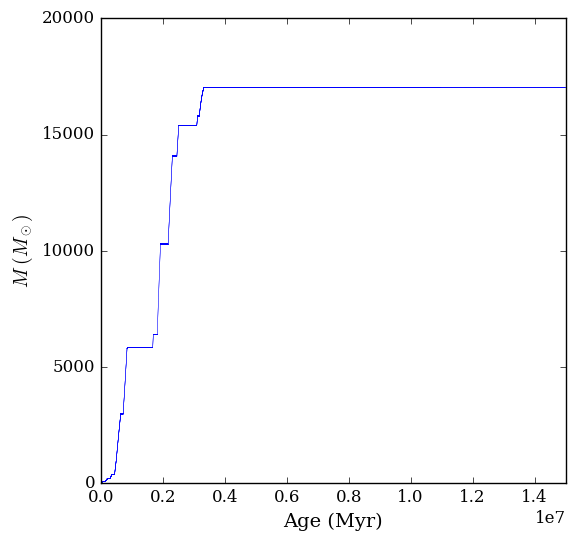

In [71]:
for d in data_sorted:
    if np.max(d[:,5])<1.45e7:
        continue
    if np.min(d[:,5])>1e4:
        continue
    if d[:,3][-1]<1e4:
        continue
    #plt.scatter(d[:, 5], d[:,3]/d[:,3][-1],s=0.1)
    plt.scatter(d[:, 5], d[:,3],s=0.1)

    
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(0,15e6)
plt.ylim(0,2e4)
plt.xlabel('Age (Myr)')
plt.ylabel(r'$M\;(M_\odot)$')

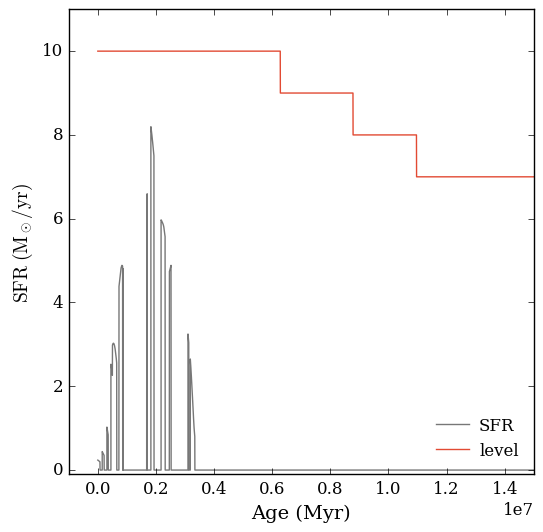

In [73]:
for d in data_sorted:
    if np.max(d[:,5])<1.45e7:
        continue
    if np.min(d[:,5])>1e4:
        continue
    if d[:,3][-1]<1e4:
        continue
    age = d[:,5]
    mass = d[:,3]
    plt.plot((age[1:]+age[:-1])/2., mass[1:]-mass[:-1], label='SFR')
    plt.plot(age, d[:,1], label='level')
    
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(-1e6,15e6)
plt.ylim(-0.1,11)
plt.legend(loc='lower right')
plt.xlabel('Age (Myr)')
plt.ylabel(r'$\rm SFR \; (M_\odot/yr)$')

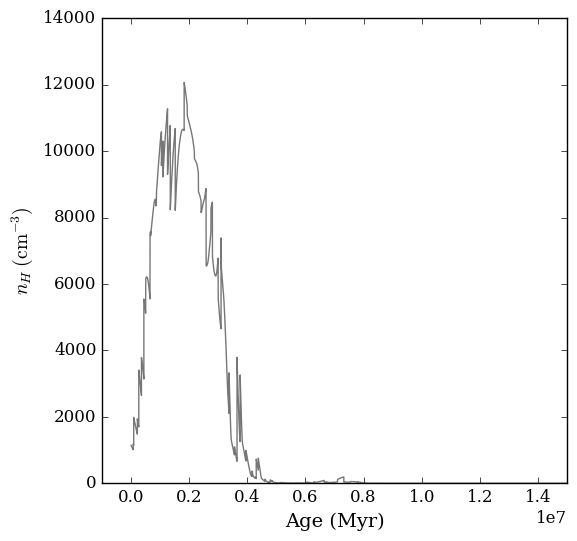

In [74]:
for d in data_sorted:
    if np.max(d[:,5])<1.45e7:
        continue
    if np.min(d[:,5])>1e4:
        continue
    if d[:,3][-1]<1e4:
        continue
    age = d[:,5]
    mass = d[:,3]
    density = d[:,6]
    fH2 = d[:,7]
    #plt.plot((age[1:]+age[:-1])/2., mass[1:]-mass[:-1])
    plt.plot(age, density)
    #plt.plot(age, fH2)
    
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(-1e6,15e6)
#plt.ylim(-0.1,1.1)
plt.legend()
plt.xlabel('Age (Myr)')
plt.ylabel(r'$n_H\;(\rm cm^{-3})$')

In [75]:
def tau_postpro(t, mass):
    dm = mass[1:]-mass[:-1]
    t_mid = (t[1:]+t[:-1])/2.
    dt = t[1:]-t[:-1]
    #dt = 1630.
    if np.sum(dm)==0:
        return np.nan, np.nan
    tau_ave = np.sum(dm*t_mid)/np.sum(dm)/1e6
    tau_spread = mass[-1]*mass[-1]/np.sum(dm*dm/dt)/1e6
    return tau_ave, tau_spread#/1.772

In [76]:
for d in data_sorted:
    if np.max(d[:,5])<1.45e7:
        continue
    if np.min(d[:,5])>1e4:
        continue
    if d[:,3][-1]<1e4:
        continue
    age = d[:,5]
    mass = d[:,3]
    density = d[:,6]
    fH2 = d[:,7]
    print tau_postpro(age, mass)

(1.7071883821349689, 0.70569043196769443)
